## ПЗ2_237_Д6_Кравченко_Кувшинов_Прикладные_методы

## *Рассмотрим нашу функцию*

$$ F = x_1 + x_2 \rightarrow \min ; \max $$
$$\begin{cases} x_1 - 2 x_2 \leq 30 \newline
                     5 x_1 - x_2 \leq 25
\end{cases}$$

при условии, что:

$$\begin{cases} x_1 \geq 0 \newline
                     x_2 \geq 0
\end{cases}$$

**Важно**

Заранее обозначаю, что решение этой функции:

$ F_{min} = (0; 0); F_{max} =$ Не имеет оптимального решения

Поэтому во всех остальных решениях при попытки максимизации, появляется одна принципиально неприятная надпись о невозможности поиска решения

---




## Графичиское решение

В данном коде, мы реализовали графики наших функций, для наглядного доказательства отстутствия пересечения между функциями, что говорит об отстутсвии возможного решения максимума функции $F = x_1 + x_2$.

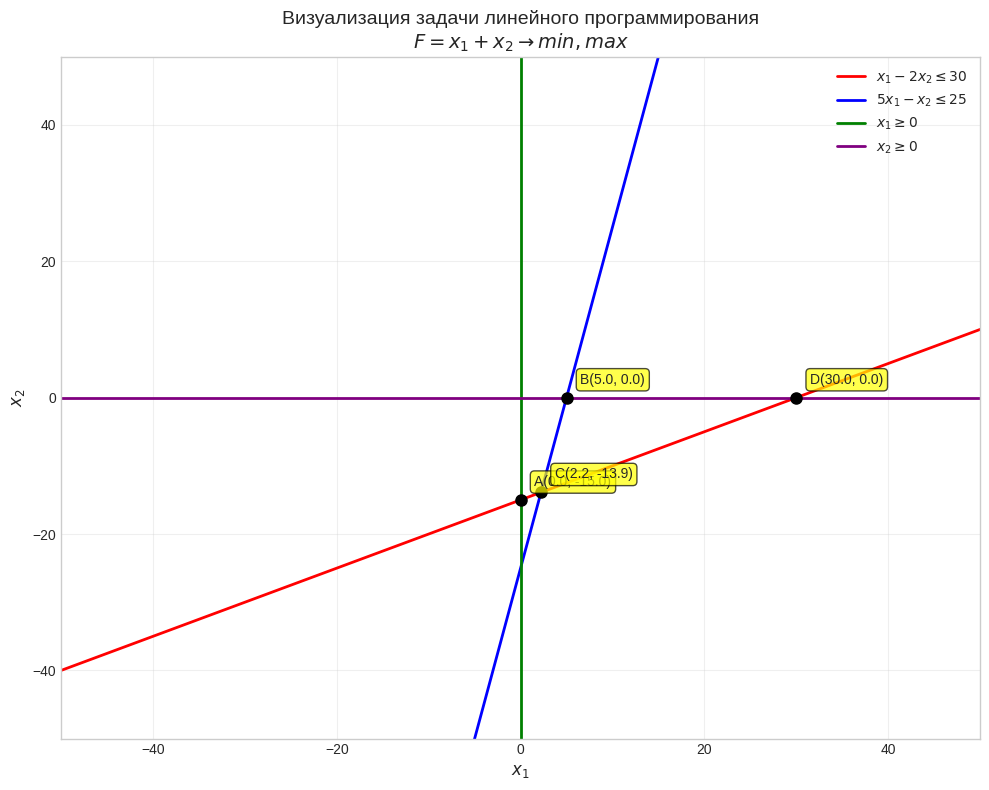

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Настройка стиля графика
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))

# Определение ограничений
x1 = np.linspace(-100, 400, 400)

# Ограничение 1: x1 - 2x2 <= 30  => x2 >= (x1 - 30)/2
x2_1 = (x1 - 30) / 2

# Ограничение 2: 5x1 - x2 <= 25  => x2 >= 5x1 - 25
x2_2 = 5 * x1 - 25

# Неотрицательные переменные
x2_zero = np.zeros_like(x1)

# Построение линий ограничений
ax.plot(x1, x2_1, 'r-', linewidth=2, label=r'$x_1 - 2x_2 \leq 30$')
ax.plot(x1, x2_2, 'b-', linewidth=2, label=r'$5x_1 - x_2 \leq 25$')
ax.axvline(x=0, color='g', linewidth=2, label=r'$x_1 \geq 0$')
ax.axhline(y=0, color='purple', linewidth=2, label=r'$x_2 \geq 0$')

# Находим точки пересечения
# Точка A: пересечение x1=0 и x1 - 2x2 = 30
A = (0, -30/2)

# Точка B: пересечение x2=0 и 5x1 - x2 = 25
B = (25/5, 0)

# Точка C: пересечение x1 - 2x2 = 30 и 5x1 - x2 = 25
# Решаем систему:
# x1 - 2x2 = 30
# 5x1 - x2 = 25
# Из второго: x2 = 5x1 - 25
# Подставляем в первое: x1 - 2(5x1 - 25) = 30
# x1 - 10x1 + 50 = 30 => -9x1 = -20 => x1 = 20/9 ≈ 2.22
# x2 = 5*(20/9) - 25 = 100/9 - 225/9 = -125/9 ≈ -13.89
C = (20/9, -125/9)

# Точка D: пересечение x2=0 и x1 - 2x2 = 30
D = (30, 0)

# Отмечаем критические точки
points = [A, B, C, D]
point_labels = ['A', 'B', 'C', 'D']

for point, label in zip(points, point_labels):
    ax.plot(point[0], point[1], 'ko', markersize=8)
    ax.annotate(f'{label}({point[0]:.1f}, {point[1]:.1f})',
                xy=point, xytext=(10, 10),
                textcoords='offset points', fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))


# Настройка графика
ax.set_xlabel(r'$x_1$', fontsize=12)
ax.set_ylabel(r'$x_2$', fontsize=12)
ax.set_title('Визуализация задачи линейного программирования\n$F = x_1 + x_2 \\rightarrow min, max$', fontsize=14)

# Установка пределов осей
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])

# Сетка
ax.grid(True, alpha=0.3)

# Легенда
ax.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


Маленькое пояснение:

Код установщик, потому что в Коллабе, не было встроенной функции Pulp

In [30]:
!pip install pulp

## Решение PULP

Программа создает две модели - для максимизации и минимизации целевой функции, используя встроенные алгоритмы симплекс-метода, и сравнивает время выполнения обеих задач.

Маленькое и важное пояснение по поводу "import time", не знаю почему, но Коллаб без неё срабатывает раз через раз и может жаловаться на команду "start = time.time()".

Лучше выглядеть позорно, чем сдавать не рабочий код.


In [42]:
print("\n=== Pulp SOLUTION ===")

from pulp import *
import time

# Решение для Максимума
start = time.time()

# Создание переменных
x1 = LpVariable("x1", lowBound=0)
x2 = LpVariable("x2", lowBound=0)

# Создать функции
problem_max = LpProblem('Maximization', LpMaximize)
problem_max += x1 + x2, "Objective Function"

# Добавить ограничения
problem_max += x1 - 2*x2 <= 30, "Constraint1"
problem_max += 5*x1 - x2 <= 25, "Constraint2"

# Решение для максимизации
problem_max.solve()

print("MAXIMIZATION:")
print("Status:", LpStatus[problem_max.status])
if problem_max.status == 1:
    print("x1 =", value(x1))
    print("x2 =", value(x2))
    print("F max =", value(problem_max.objective))
else:
    print("Optimal solution not found")

max_time_pulp = time.time() - start

# Решение для минимума
start = time.time()

problem_min = LpProblem('Minimization', LpMinimize)
problem_min += x1 + x2, "Objective Function"
problem_min += x1 - 2*x2 <= 30, "Constraint1"
problem_min += 5*x1 - x2 <= 25, "Constraint2"

problem_min.solve()

print("\nMINIMIZATION:")
print("Status:", LpStatus[problem_min.status])
print("x1 =", value(x1))
print("x2 =", value(x2))
print("F min =", value(problem_min.objective))

min_time_pulp = time.time() - start

print(f"\nPuLP Execution time:")
print(f"Maximization: {max_time_pulp:.6f} sec")
print(f"Minimization: {min_time_pulp:.6f} sec")



=== Pulp SOLUTION ===
MAXIMIZATION:
Status: Unbounded
Optimal solution not found

MINIMIZATION:
Status: Optimal
x1 = 0.0
x2 = 0.0
F min = 0.0

PuLP Execution time:
Maximization: 0.008075 sec
Minimization: 0.006989 sec


## Решение SciPy

Данный код использует функцию linprog из библиотеки SciPy для численного решения задачи линейной оптимизации стандартными методами математического программирования. Для максимизации применяется классический прием преобразования задачи через умножение целевой функции на -1, что позволяет использовать тот же алгоритм минимизации для нахождения обоих экстремумов.

In [43]:
print("=== SciPy SOLUTION ===")

from scipy.optimize import linprog

# Коэффициенты целевой функции
c = [1, 1]  # F = x1 + x2

# Матрица ограничений неравенств (A_ub * x <= b_ub)
A_ub = [[1, -2],   # x1 - 2x2 <= 30
        [5, -1]]   # 5x1 - x2 <= 25
b_ub = [30, 25]

# Границы переменных
bounds = [(0, None), (0, None)]  # x1 >= 0, x2 >= 0

# Минимизация
start = time.time()
res_min = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')
min_time_scipy = time.time() - start

print("MINIMIZATION:")
if res_min.success:
    print(f"x1 = {res_min.x[0]:.6f}")
    print(f"x2 = {res_min.x[1]:.6f}")
    print(f"F min = {res_min.fun:.6f}")
else:
    print(f"Решение не найдено: {res_min.message}")

# Максимизация (умножаем целевую функцию на -1)
start = time.time()
res_max = linprog([-1, -1], A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')
max_time_scipy = time.time() - start

print("\nMAXIMIZATION:")
if res_max.success:
    print(f"x1 = {res_max.x[0]:.6f}")
    print(f"x2 = {res_max.x[1]:.6f}")
    print(f"F max = {-res_max.fun:.6f}")
else:
    print(f"Решение не найдено: {res_max.message}")

print(f"\nSciPy Execution time:")
print(f"Minimization: {min_time_scipy:.6f} sec")
print(f"Maximization: {max_time_scipy:.6f} sec")


=== SciPy SOLUTION ===
MINIMIZATION:
x1 = 0.000000
x2 = 0.000000
F min = 0.000000

MAXIMIZATION:
Решение не найдено: The problem is unbounded. (HiGHS Status 10: model_status is Unbounded; primal_status is Feasible)

SciPy Execution time:
Minimization: 0.004471 sec
Maximization: 0.005377 sec


## Решение Cvxopt

Данный код применяет библиотеку CVXOPT, которая использует методы внутренней точки для решения задач выпуклой оптимизации. Особенностью подхода является объединение всех ограничений в одну матрицу, включая условия неотрицательности переменных, что позволяет решать обе задачи (минимизации и максимизации) в стандартной канонической форме.

In [44]:
print("=== Cvxopt SOLUTION ===")

from cvxopt import matrix, solvers

# Отключение вывода CVXOPT
solvers.options['show_progress'] = False

# Коэффициенты целевой функции
c_min = matrix([1.0, 1.0])  # Минимизация x1 + x2
c_max = matrix([-1.0, -1.0])  # Максимизация x1 + x2

# Ограничения: G*x <= h
# Добавляем ограничения x >= 0: -x <= 0 => [-I] * x <= [0, 0]
G_with_bounds = matrix([[1.0, 5.0, -1.0, 0.0],
                       [-2.0, -1.0, 0.0, -1.0]])
h_with_bounds = matrix([30.0, 25.0, 0.0, 0.0])

# Минимизация
start = time.time()
sol_min = solvers.lp(c_min, G_with_bounds, h_with_bounds)
min_time_cvxopt = time.time() - start

print("MINIMIZATION:")
if sol_min['status'] == 'optimal':
    x_min = sol_min['x']
    print(f"x1 = {x_min[0]:.6f}")
    print(f"x2 = {x_min[1]:.6f}")
    print(f"F min = {sol_min['primal objective']:.6f}")
else:
    print(f"Решение не найдено: {sol_min['status']}")

# Максимизация
start = time.time()
sol_max = solvers.lp(c_max, G_with_bounds, h_with_bounds)
max_time_cvxopt = time.time() - start

print("\nMAXIMIZATION:")
if sol_max['status'] == 'optimal':
    x_max = sol_max['x']
    print(f"x1 = {x_max[0]:.6f}")
    print(f"x2 = {x_max[1]:.6f}")
    print(f"F max = {-sol_max['primal objective']:.6f}")
else:
    print(f"Решение не найдено: {sol_max['status']}")

print(f"\nCVXOPT Execution time:")
print(f"Minimization: {min_time_cvxopt:.6f} sec")
print(f"Maximization: {max_time_cvxopt:.6f} sec")


=== Cvxopt SOLUTION ===
MINIMIZATION:
x1 = 0.000000
x2 = 0.000000
F min = 0.000000

MAXIMIZATION:
Решение не найдено: dual infeasible

CVXOPT Execution time:
Minimization: 0.004858 sec
Maximization: 0.001455 sec


## Самая быстрая библиотека

Сравнение библиотек по времени.

In [45]:
print("=== PERFORMANCE COMPARISON ===")

print(f"\nPulp:")
print(f"  Minimization: {min_time_pulp:.6f} sec")
print(f"  Maximization: {max_time_pulp:.6f} sec")
print(f"  Total: {min_time_pulp + max_time_pulp:.6f} sec")

print(f"\nSciPy:")
print(f"  Minimization: {min_time_scipy:.6f} sec")
print(f"  Maximization: {max_time_scipy:.6f} sec")
print(f"  Total: {min_time_scipy + max_time_scipy:.6f} sec")

print(f"\nCvxopt:")
print(f"  Minimization: {min_time_cvxopt:.6f} sec")
print(f"  Maximization: {max_time_cvxopt:.6f} sec")
print(f"  Total: {min_time_cvxopt + max_time_cvxopt:.6f} sec")

# Определение самого быстрого метода
times = {
    'Pulp': min_time_pulp + max_time_pulp,
    'SciPy': min_time_scipy + max_time_scipy,
    'Cvxopt': min_time_cvxopt + max_time_cvxopt
}

fastest_method = min(times, key=times.get)
print(f"\nСамый быстрый метод: {fastest_method} ({times[fastest_method]:.6f} sec)")

=== PERFORMANCE COMPARISON ===

Pulp:
  Minimization: 0.006989 sec
  Maximization: 0.008075 sec
  Total: 0.015064 sec

SciPy:
  Minimization: 0.004471 sec
  Maximization: 0.005377 sec
  Total: 0.009848 sec

Cvxopt:
  Minimization: 0.004858 sec
  Maximization: 0.001455 sec
  Total: 0.006314 sec

Самый быстрый метод: Cvxopt (0.006314 sec)


## Вывод:

**Формальный:**

Мы изучили и использовали три библиотеки, для решения задач Линейнного программирования, допольнительно оттачили навыки пользования Colab и GitHub.

**Неформальный:**

Pulp – приятный и удобный

SciPy – менее удобный, но тоже добрый

Cvxopt – сложна, но быстро и канонично!
